Columns in CSV: ['Name', 'Input List', 'Start Frame', 'Area AVG', 'Area STD', 'RG AVG', 'RG STD', 'RDF Peak', 'Coordination at Minimum', 'backbone_length', 'mean_charge', 'sum_charge', 'max_charge', 'min_charge', 'std_charge', 'mean_length', 'max_length', 'std_length', 'max_S_block', 'max_E_block', 'transitions', 'max_block_size', 'min_block_size', 'mean_block_size', 'std_block_size', 'blockiness', 'gini', 'max_fft_value', 'mean_fft_value', 'sum_fft_value', 'std_fft_value', 'hydrophobic_ratio', 'hydrophobic_ratio_weighted', 'harwoods_blockiness', 'mayo_lewis']


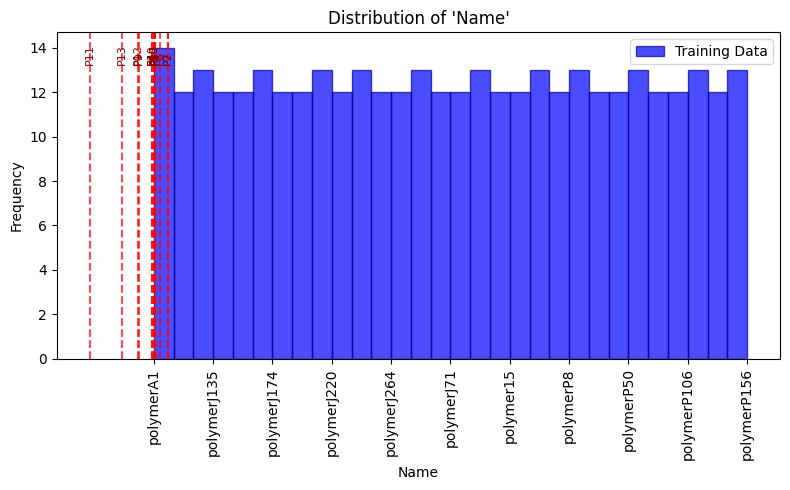

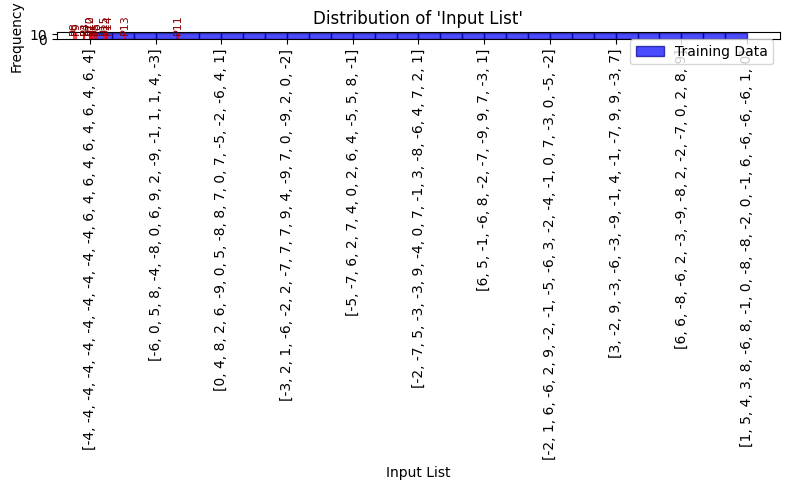

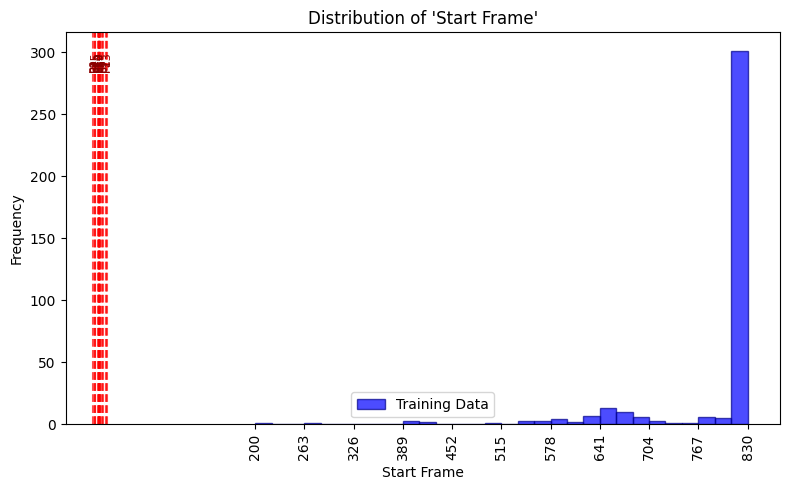

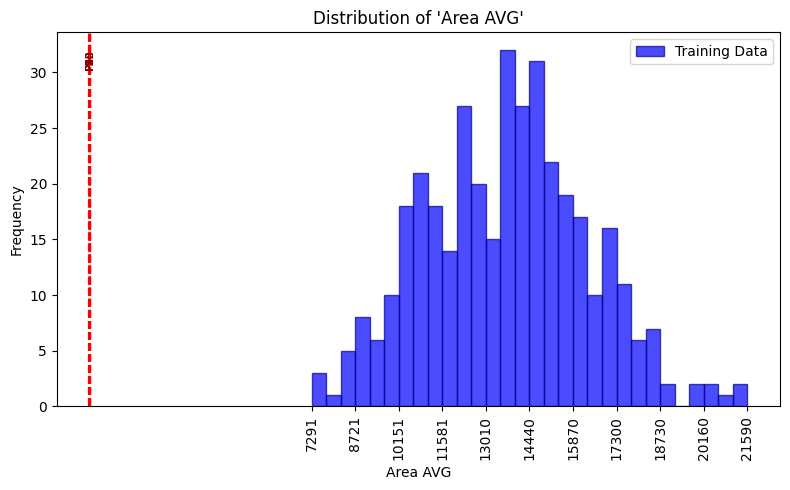

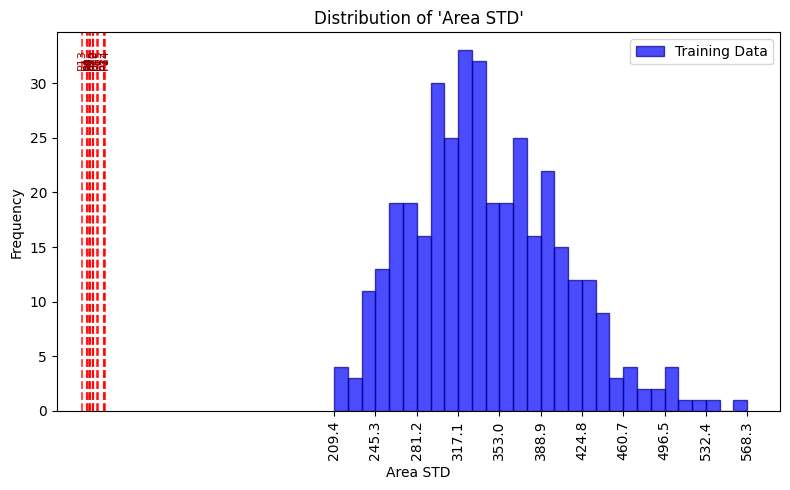

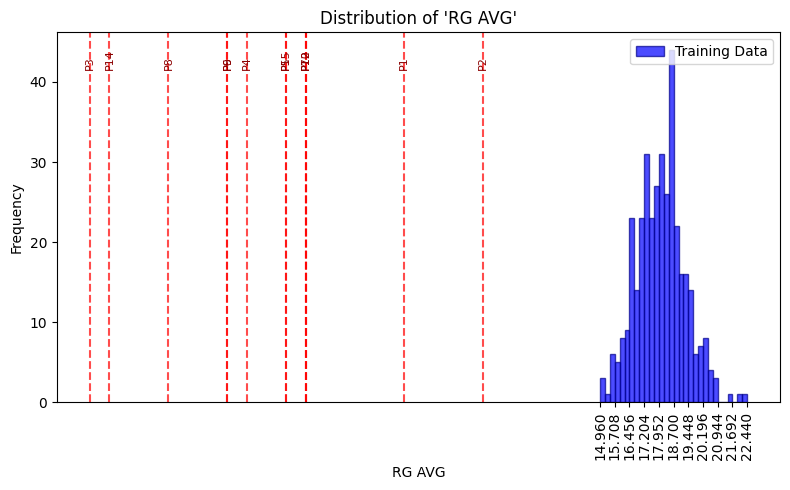

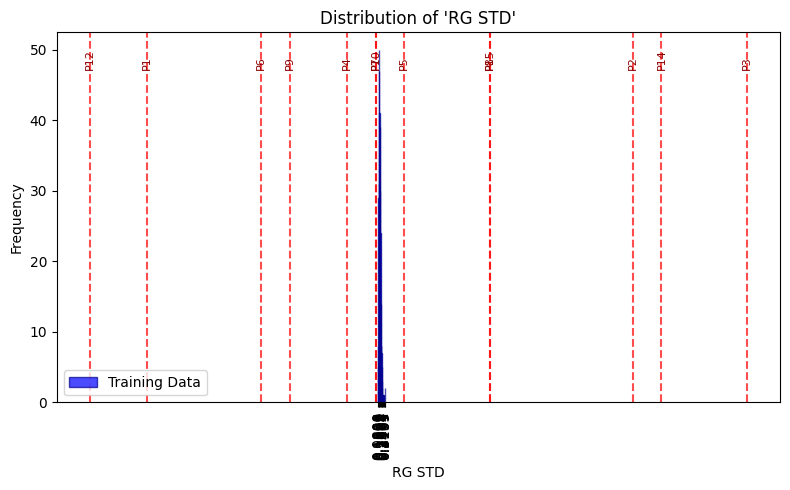

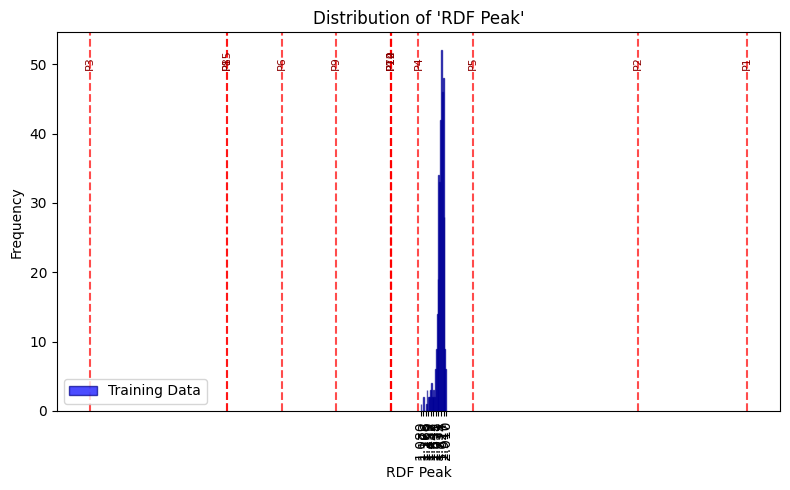

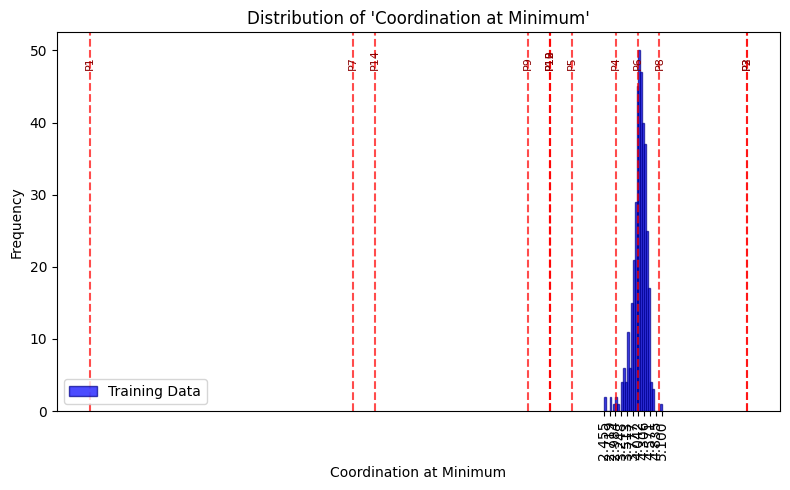

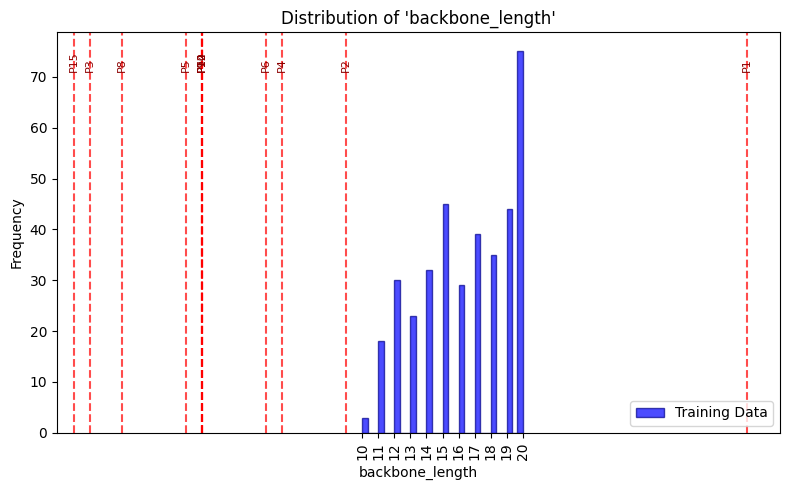

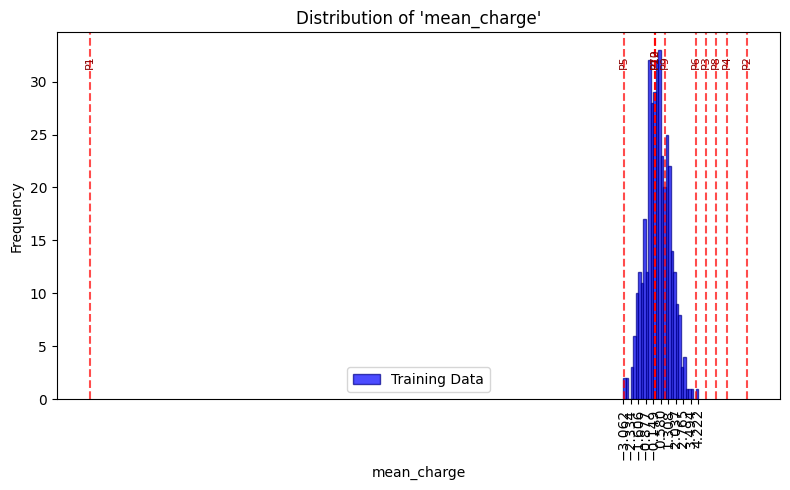

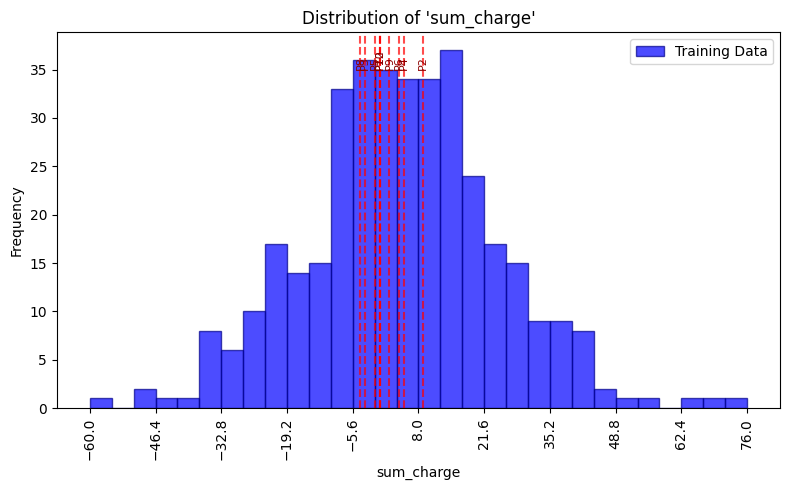

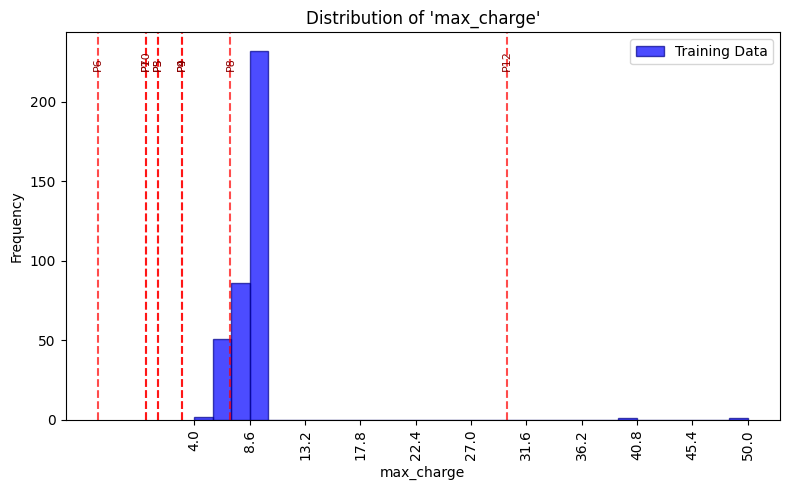

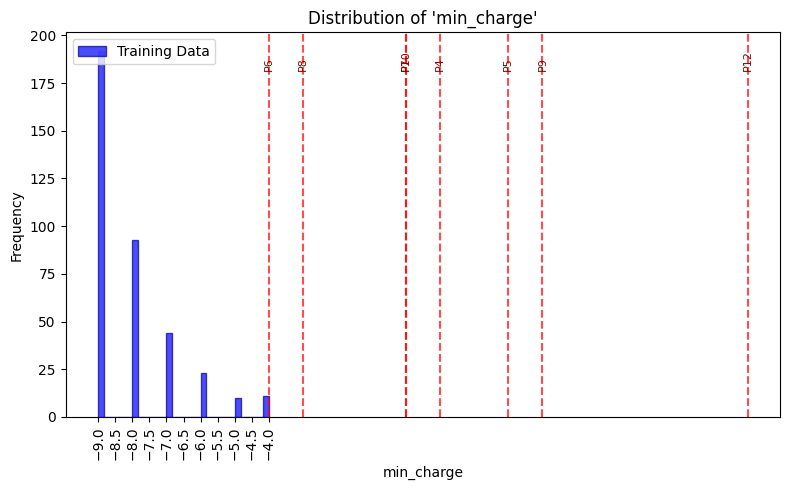

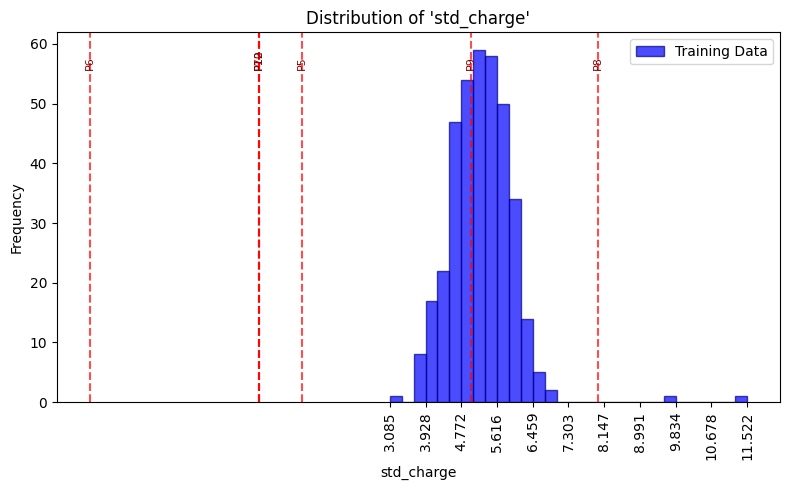

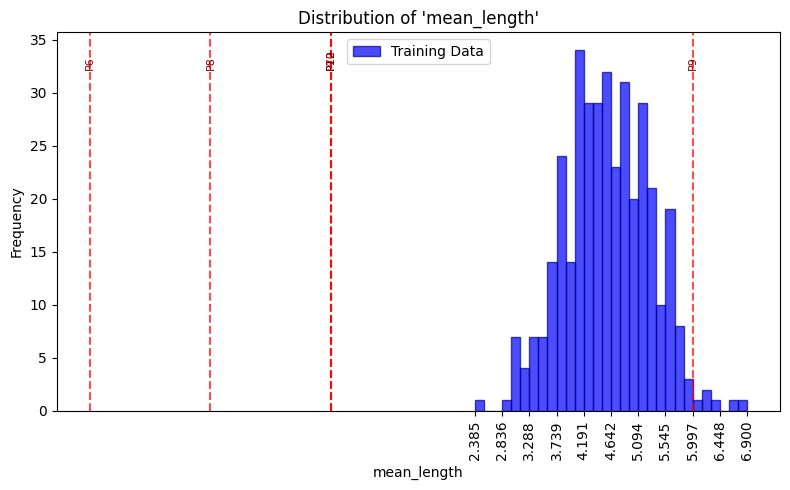

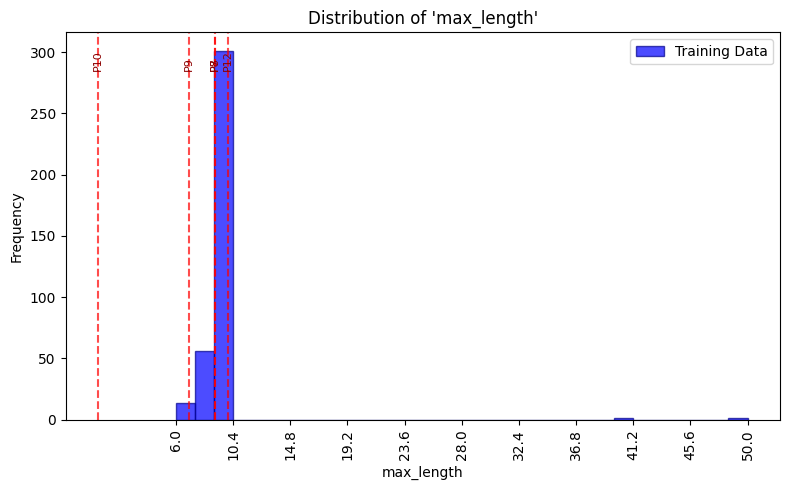

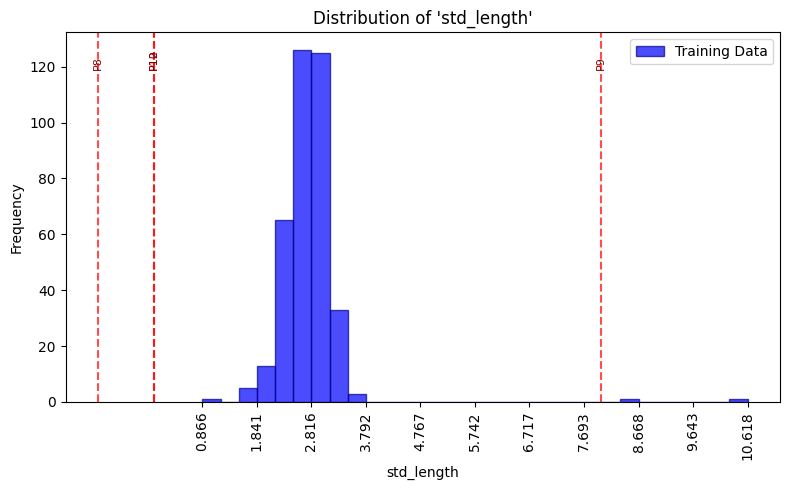

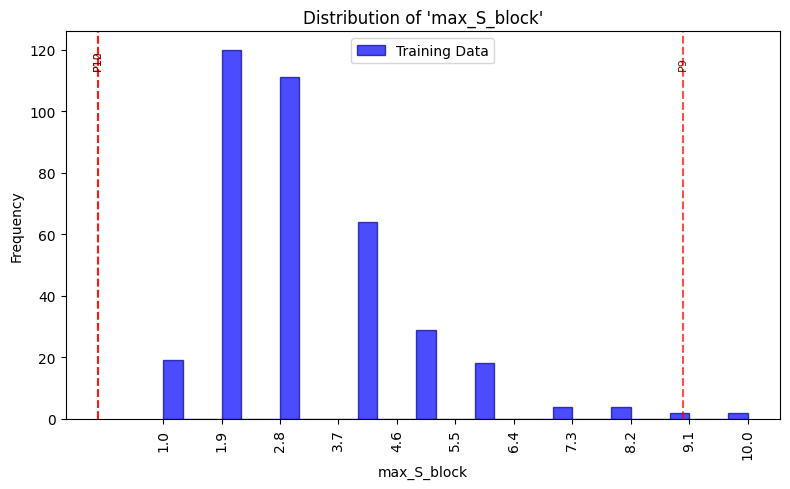

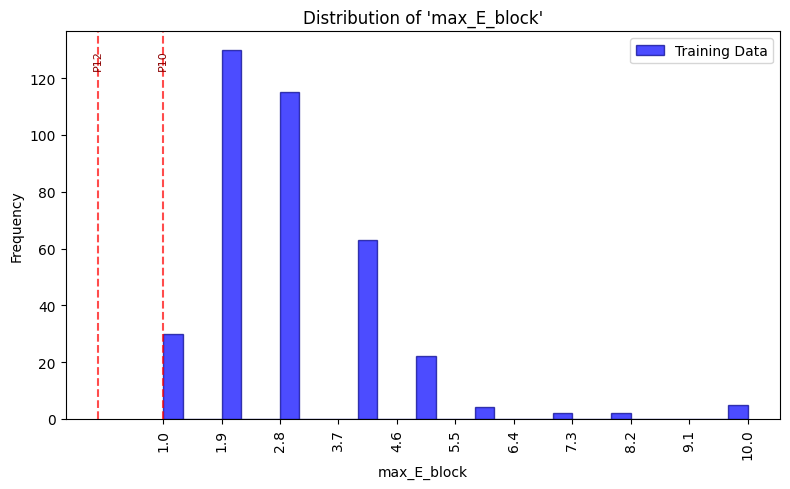

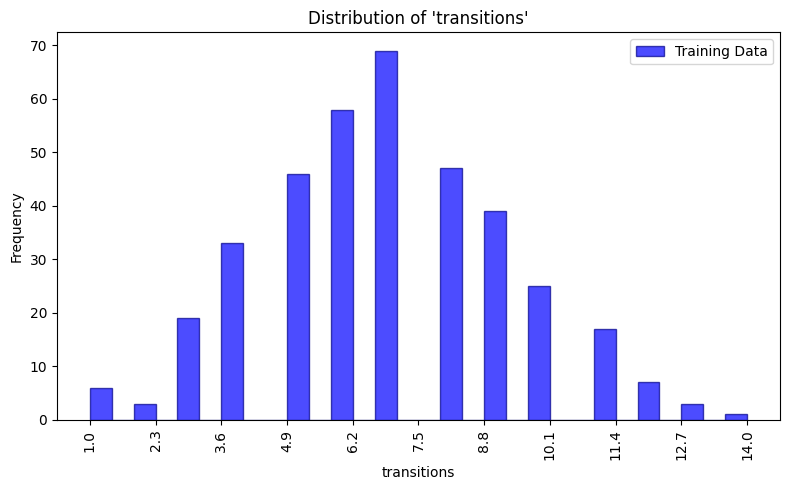

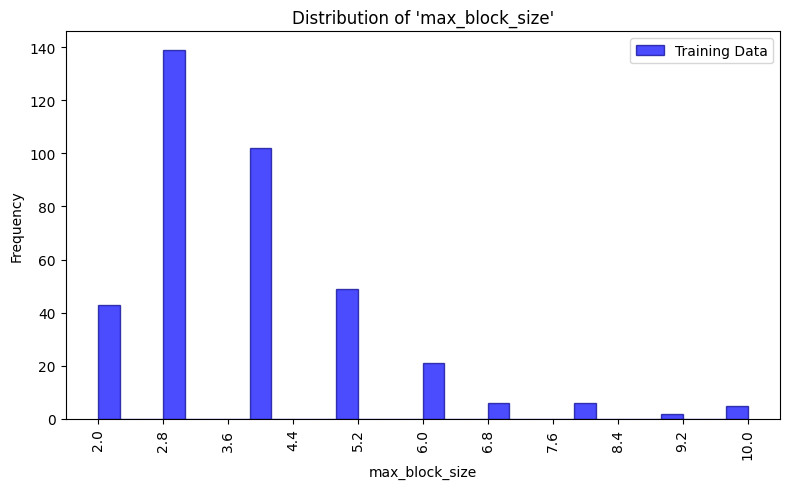

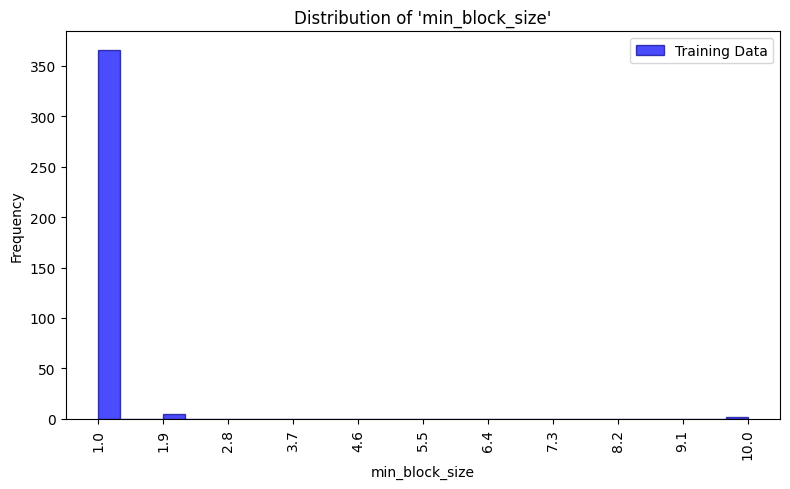

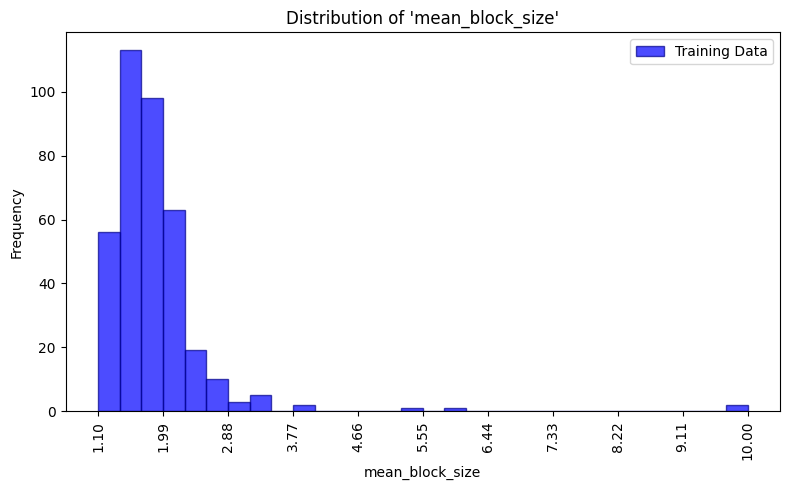

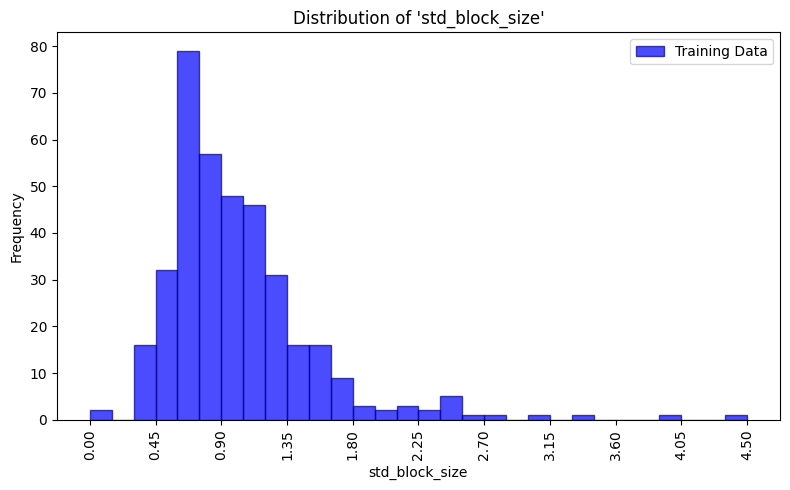

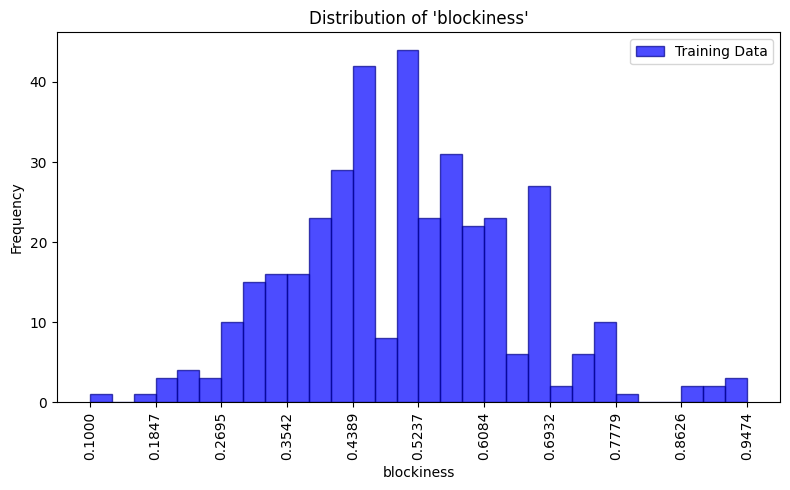

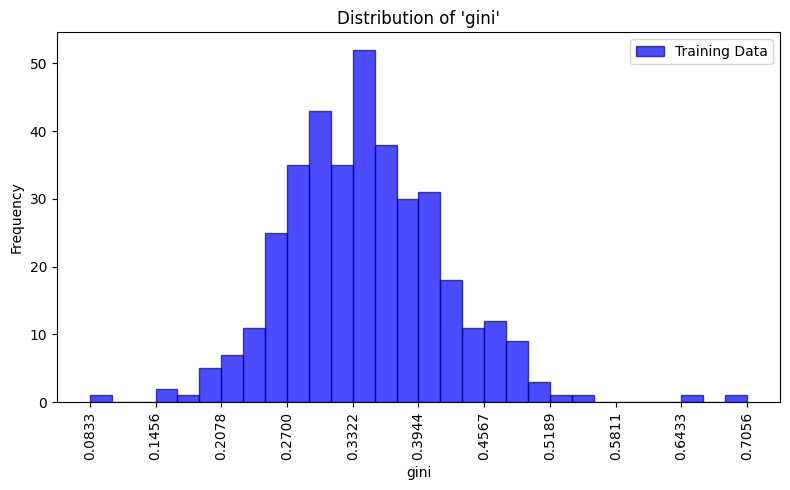

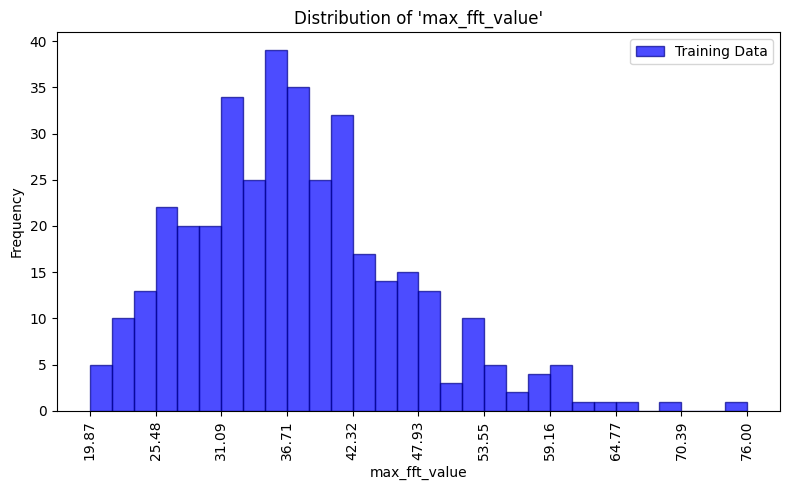

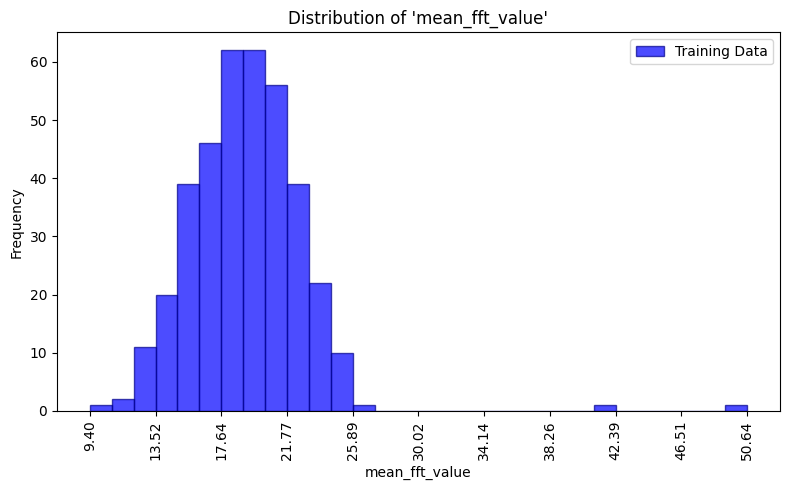

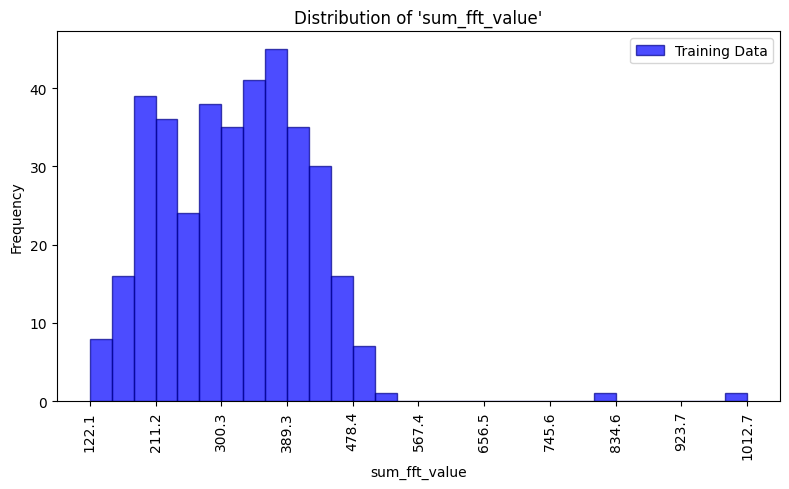

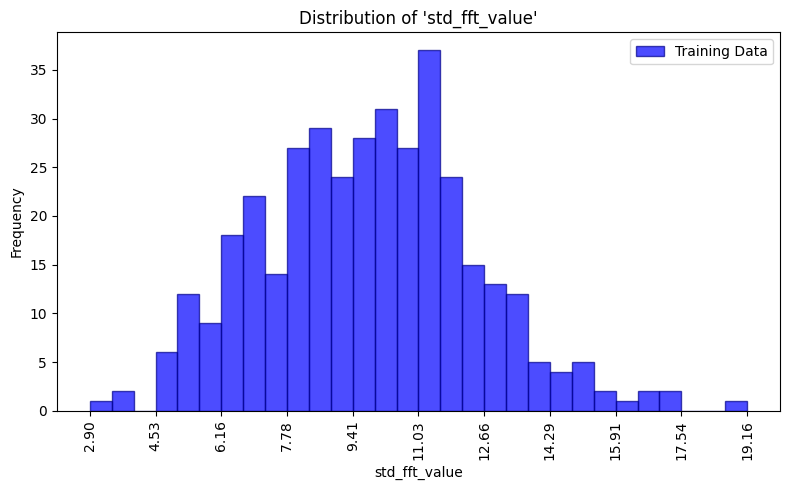

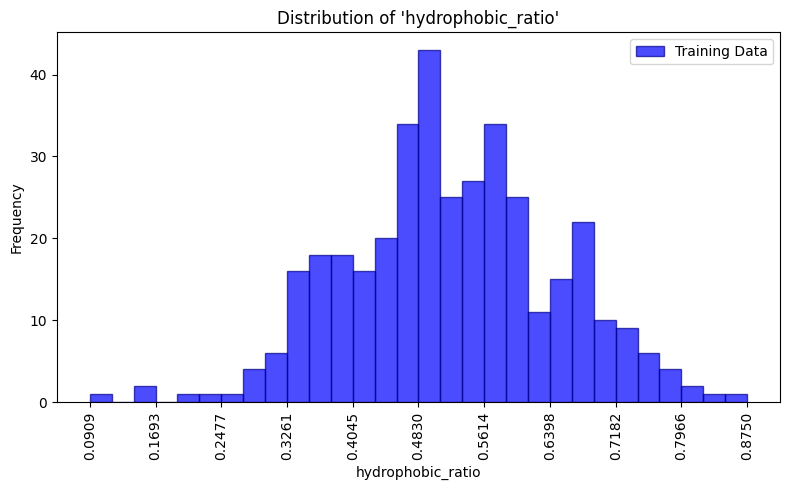

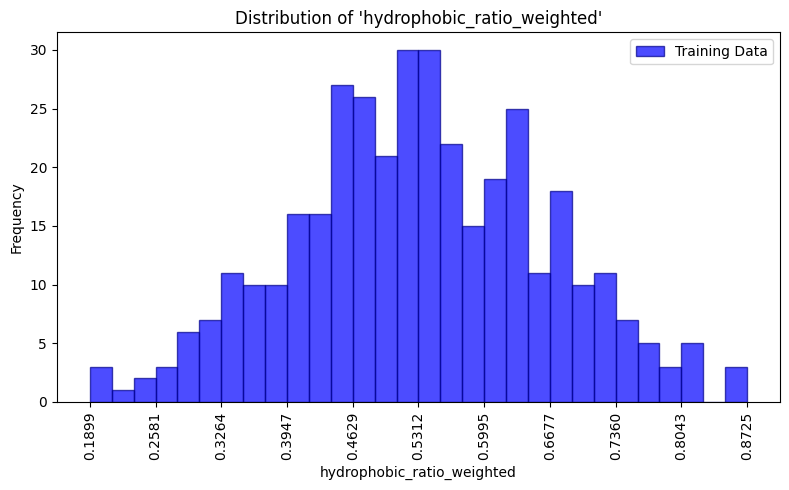

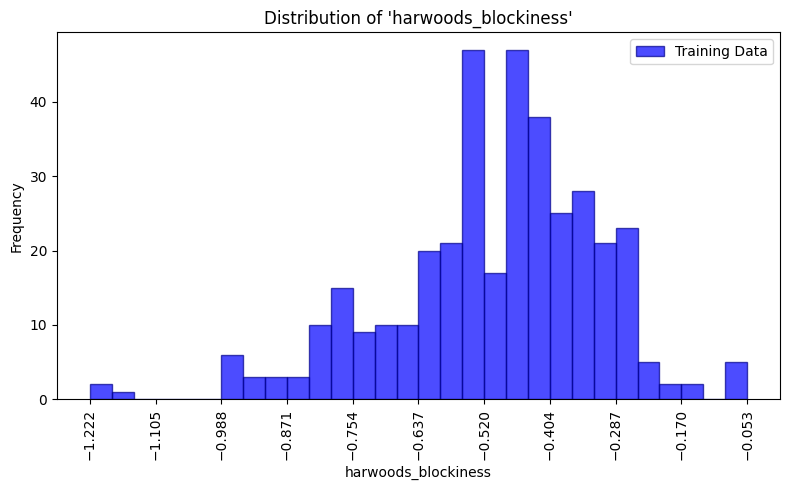

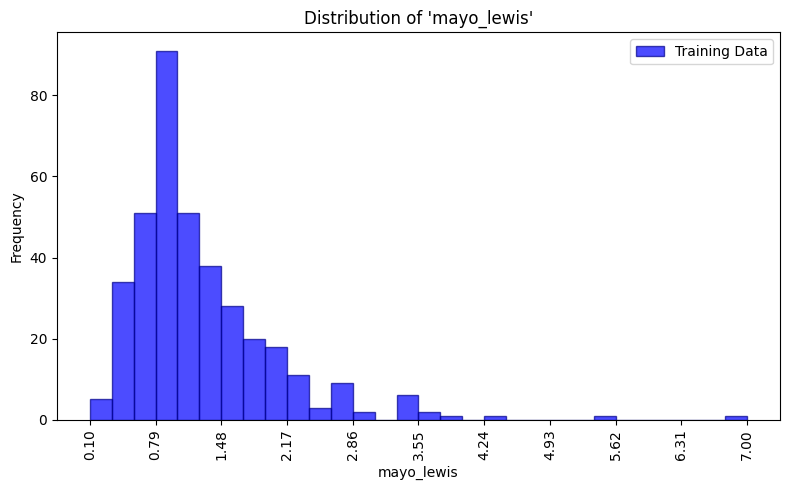

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

# Load training data (used for histogram)
train_url = "https://raw.githubusercontent.com/JordanCarden/LinearRegression/main/data/combined_feature.csv"
train_df = pd.read_csv(train_url)

# Load 15 polymer red line data from local file (as strings)
sequences_raw = pd.read_csv("data/15polymers_feature.csv", skiprows=1, header=None)[0]

# Convert string representations into lists of numbers
sequences = [ast.literal_eval(seq) for seq in sequences_raw]

# Show available columns
print("Columns in CSV:", train_df.columns.tolist())

# Exclude non-feature columns
exclude_cols = ['polymer_id', 'target']
feature_cols = [col for col in train_df.columns if col not in exclude_cols]

# Plot histograms for each feature
for col_idx, feature in enumerate(feature_cols):
    plt.figure(figsize=(8, 5))

    # Drop NA values
    train_values = train_df[feature].dropna()

    # Plot histogram
    counts, bins, _ = plt.hist(
        train_values,
        bins=30,
        alpha=0.7,
        label='Training Data',
        color='blue',
        edgecolor='darkblue'
    )

    # Red dotted lines from 15 polymer values
    for idx, seq in enumerate(sequences):
        if col_idx < len(seq):  # protect against length mismatch
            value = seq[col_idx]
            if pd.notna(value):
                plt.axvline(value, color='red', linestyle='--', alpha=0.7)
                plt.text(
                    value,
                    max(counts) * 0.95,
                    f'P{idx+1}',
                    rotation=90,
                    fontsize=8,
                    color='darkred',
                    ha='center',
                    bbox=dict(facecolor='none', edgecolor='none')
                )

    # X ticks and labels
    plt.xticks(np.linspace(min(bins), max(bins), num=11))
    plt.title(f"Distribution of '{feature}'")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()
